## Economy Population

자료 : 월별 경제활동 인구(99.06 ~ 22.11)


In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

series = pd.read_csv('./ecopop.csv', parse_dates=['Date'],
                     header=0, index_col=0)  # 282개

print(series)

            Economy Population
Date                          
1999-06-01             22088.0
1999-07-01             22062.0
1999-08-01             21896.0
1999-09-01             22155.0
1999-10-01             22277.0
...                        ...
2022-07-01             29311.0
2022-08-01             29024.5
2022-09-01             29092.7
2022-10-01             29110.0
2022-11-01             29086.5

[282 rows x 1 columns]


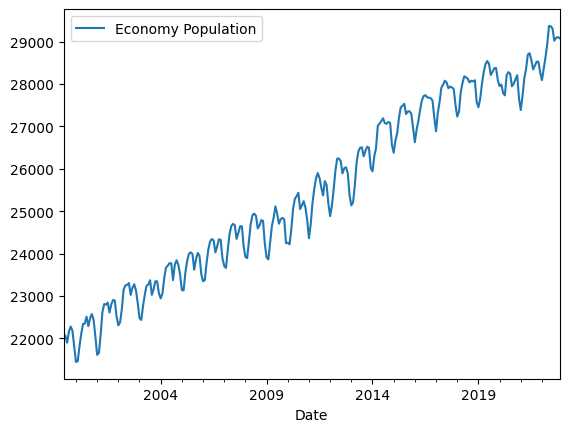

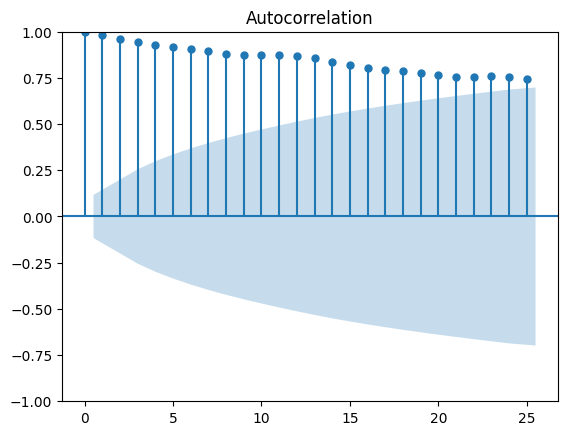

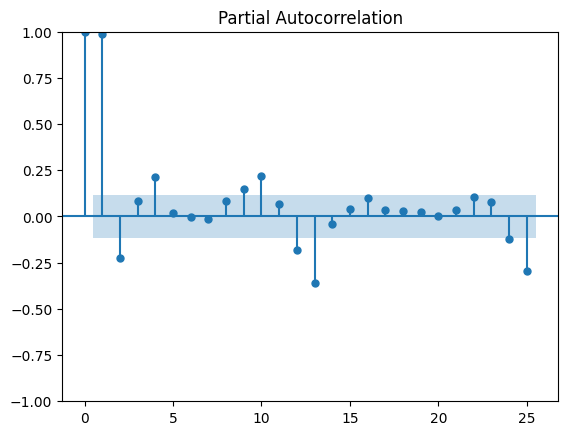

In [2]:

series.plot()
plot_acf(series)
plot_pacf(series)

plt.show()


#### 원본 그래프
* 우상향 하는 추세를 보이고 있음
* 강한 계절성을 보임

#### ACF
* 천천히 우하향하는 모습을 보임


#### PACF
* 1시점 이후에 급격히 감소함

<br>
➡️따라서 AR(1)모델이 적함함

In [3]:
series_diff1 = series.diff().dropna()
series_diff2 = series.diff().diff().dropna()

series_diff1.plot()
series_diff2.plot()

<AxesSubplot:xlabel='Date'>

Error in callback <function flush_figures at 0x00000284CD79F790> (for post_execute):


KeyboardInterrupt: 

In [ ]:
from pmdarima import auto_arima


opt = auto_arima(series[:250], seasonal=False, trace=True, information_criterion='bic')
print(opt.summary())

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=3456.666, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=3423.080, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=3412.183, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=3453.319, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=3416.610, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : BIC=3414.018, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : BIC=3407.713, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : BIC=3411.951, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : BIC=3409.115, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : BIC=3418.246, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : BIC=3402.542, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0]             : BIC=inf, Time=0.57 sec
 ARIMA(1,1,3)(0,0,0)[0]             : BIC=3385.6

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(series, order=(1, 1, 0))
model_fit1 = model1.fit()
print(model_fit1.summary())

model2 = ARIMA(series, order=(2, 1, 1))
model_fit2 = model2.fit()
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:     Economy Population   No. Observations:                  282
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1922.636
Date:                Tue, 03 Jan 2023   AIC                           3849.271
Time:                        15:10:30   BIC                           3856.548
Sample:                    06-01-1999   HQIC                          3852.190
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3651      0.050      7.257      0.000       0.267       0.464
sigma2      5.073e+04   4446.055     11.411      0.000     4.2e+04    5.94e+04
Ljung-Box (L1) (Q):                   6.75   Jarque-

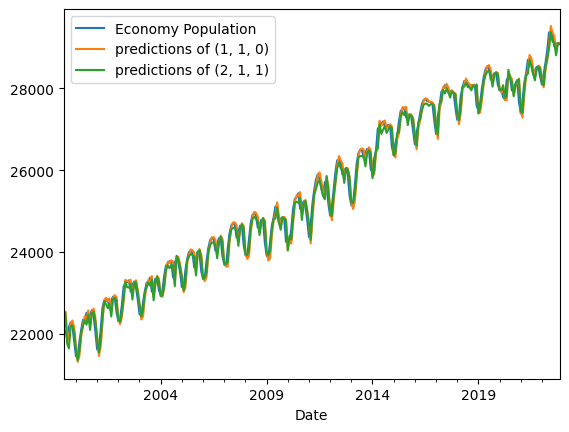

In [ ]:
series.plot()
model_fit1.predict(start = 1).plot(label="predictions of (1, 1, 0)")
model_fit2.predict(start = 1).plot(label="predictions of (2, 1, 1)")
plt.legend()
plt.show()


### 250개 학습, 32개 예측

In [ ]:
series.iloc[250]

Economy Population    27733.8
Name: 2020-04-01 00:00:00, dtype: float64

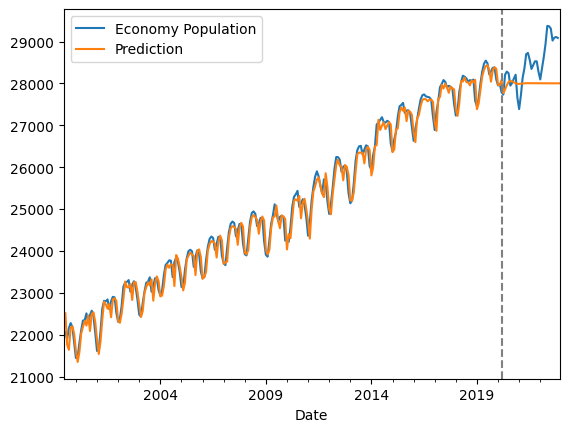

In [ ]:
model  = ARIMA(series[:250], order = (2,1,1))
model_fit = model.fit()

series.plot()
model_fit.predict(start = 1, end=282).plot(label = "Prediction")
plt.axvline(x='2020-3', color='gray', linestyle='--')
plt.legend()
plt.show()

### 200개 학습, 82개 예측

In [ ]:
series.iloc[200]

Economy Population    26924.7
Name: 2016-02-01 00:00:00, dtype: float64

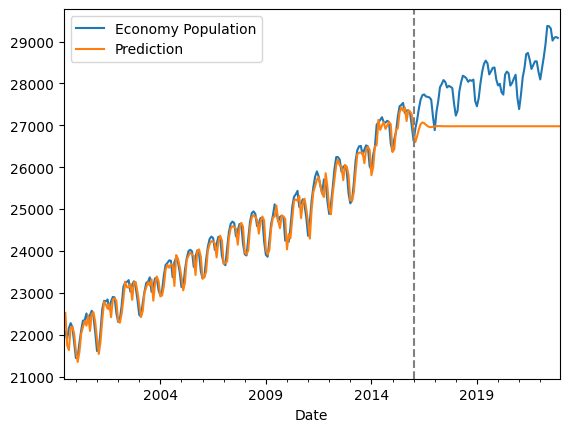

In [ ]:
model = ARIMA(series[:200], order=(2, 1, 1))
model_fit = model.fit()

series.plot()
model_fit.predict(start = 1 , end=282).plot(label="Prediction")
plt.axvline(x='2016/01', color='gray', linestyle='--')
plt.legend()
plt.show()


## SARIMA 찾기

In [ ]:
opt = auto_arima(series[:250], seasonal=True,m=12, trace=True,information_criterion='bic')
print(opt.summary())

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : BIC=inf, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : BIC=3456.666, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : BIC=3121.149, Time=0.66 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : BIC=3298.763, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : BIC=3453.319, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : BIC=3423.080, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : BIC=inf, Time=2.09 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : BIC=3067.094, Time=0.98 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : BIC=3301.103, Time=0.34 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : BIC=3072.584, Time=2.79 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : BIC=3072.575, Time=2.97 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : BIC=3242.706, Time=1.16 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : BIC=inf, Time=3.54 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : BIC=3066.310, Time=0.74 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept

In [ ]:
series.iloc[250]

Economy Population    27733.8
Name: 2020-04-01 00:00:00, dtype: float64

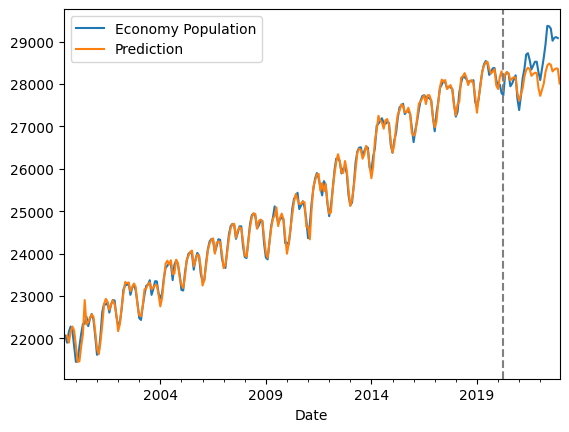

                                     SARIMAX Results                                      
Dep. Variable:                 Economy Population   No. Observations:                  250
Model:             ARIMA(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1522.216
Date:                            Tue, 03 Jan 2023   AIC                           3050.433
Time:                                    15:11:13   BIC                           3060.985
Sample:                                06-01-1999   HQIC                          3054.680
                                     - 03-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9782      0.007    130.482      0.000       0.963       0.993
ma.S.L12      -0.6603      0.054   

In [ ]:
model_s = ARIMA(series[:250], order=(0, 1, 0), seasonal_order=(1,0,1,12))
model_s_fit = model_s.fit()

series.plot()
model_s_fit.predict(start=2, end=282).plot(label="Prediction")
plt.axvline(x='2020-04', color='gray', linestyle='--')
plt.legend()
plt.show()
print(model_s_fit.summary())


In [ ]:
opt_bic = auto_arima(series[:100], seasonal=True, m = 12,
                 trace=True, information_criterion='bic')
opt_aic = auto_arima(series[:100], seasonal=True, m=12,
                     trace=True, information_criterion='aic')


Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : BIC=inf, Time=1.81 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : BIC=1161.386, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : BIC=1072.387, Time=0.76 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : BIC=1097.544, Time=0.63 sec
 ARIMA(0,0,0)(0,1,0)[12]             : BIC=1288.694, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : BIC=1091.523, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : BIC=1073.242, Time=2.12 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : BIC=inf, Time=0.72 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : BIC=1078.150, Time=0.83 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : BIC=1077.704, Time=2.57 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : BIC=1148.141, Time=0.45 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : BIC=1076.847, Time=0.96 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : BIC=1077.767, Time=1.11 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : BIC=1093.316, Time=1.02 sec
 ARIMA(2,0,1)(1,1,0)[12] inte

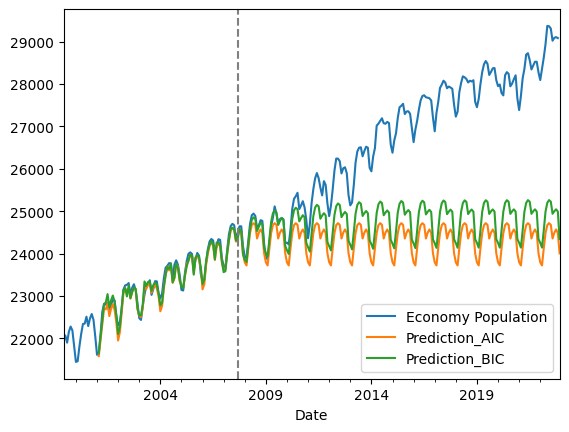

In [ ]:
model1 = ARIMA(series[:100], order=(1, 0, 0), seasonal_order=(1, 1, 0, 12))
model_fit1 = model1.fit()
model2 = ARIMA(series[:100], order=(1, 0, 0), seasonal_order=(2, 1, 0, 12))
model_fit2 = model2.fit()


series.plot()
model_fit1.predict(start=20, end=282).plot(label="Prediction_AIC")
model_fit2.predict(start=20, end=282).plot(label="Prediction_BIC")
plt.axvline(x='2007-09', color='gray', linestyle='--')
plt.legend()
plt.show()



### <em>차분이 많아질 수록 왜 추세는 맞아질까?</em>

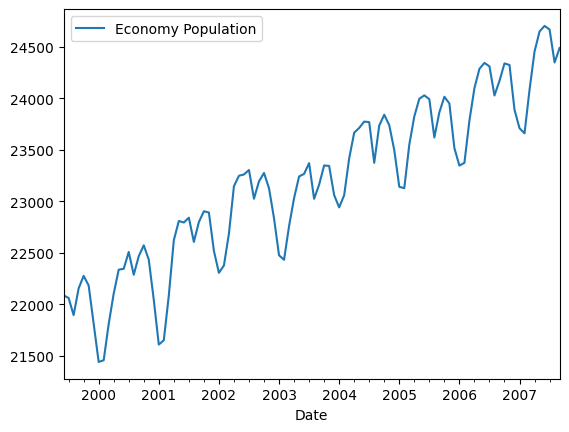

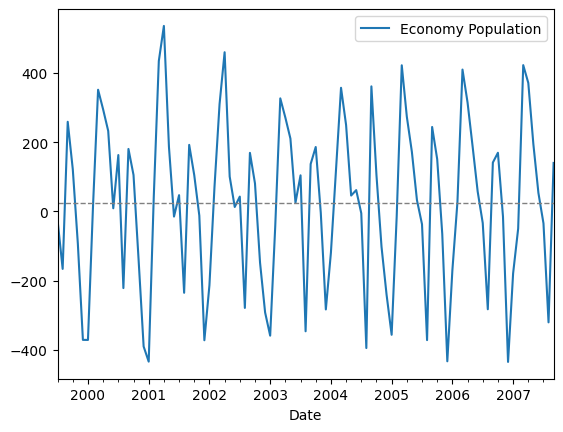

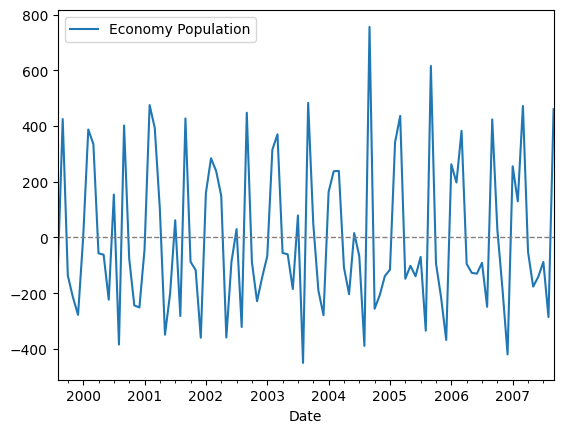

In [ ]:
series[:100].plot()
series[:100].diff().dropna().plot()
plt.axhline(y=24.233333, color='gray', linewidth=1, linestyle='--')
series[:100].diff().diff().dropna().plot()
plt.axhline(y=1.694898, color='gray', linewidth=1, linestyle='--')


In [ ]:
from statsmodels.tsa.stattools import adfuller

print(adfuller(series[:200], autolag='BIC'))
print(adfuller(series[:200].diff().dropna(), autolag='BIC'))
print(adfuller(series[:200].diff().diff().dropna(), autolag='BIC'))

(0.3705458535958824, 0.9803594116483945, 13, 186, {'1%': -3.466005071659723, '5%': -2.8772078537639385, '10%': -2.5751221620996647}, 2301.8248387170324)
(-3.00425221215225, 0.03449920082473841, 12, 186, {'1%': -3.466005071659723, '5%': -2.8772078537639385, '10%': -2.5751221620996647}, 2285.3290327626164)
(-16.847228395924798, 1.1259851771175835e-29, 11, 186, {'1%': -3.466005071659723, '5%': -2.8772078537639385, '10%': -2.5751221620996647}, 2278.0521439270015)


In [ ]:
series.iloc[199]

Economy Population    26630.8
Name: 2016-01-01 00:00:00, dtype: float64

In [ ]:
opt = auto_arima(series[:200], seasonal=True, m=12,
                     trace=True, information_criterion='bic')

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : BIC=inf, Time=1.96 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : BIC=2776.744, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : BIC=2499.673, Time=0.71 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : BIC=2653.787, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : BIC=2773.071, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : BIC=2751.230, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : BIC=inf, Time=2.15 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : BIC=2446.568, Time=1.29 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : BIC=2655.743, Time=0.44 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : BIC=inf, Time=nan sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : BIC=2451.823, Time=2.93 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : BIC=2607.321, Time=1.08 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : BIC=inf, Time=3.52 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : BIC=2447.263, Time=0.78 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : B

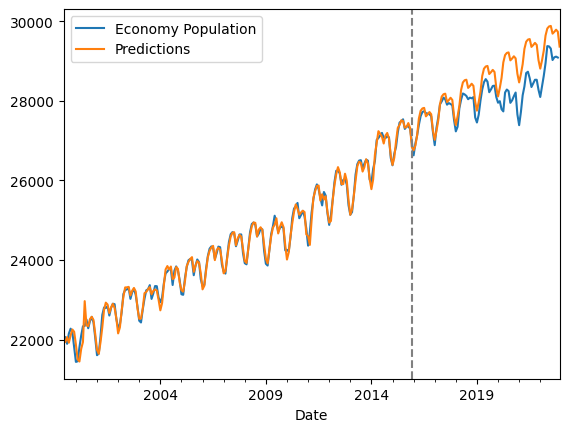

In [ ]:
model = ARIMA(series[:200], order = (1,1,0), seasonal_order=(1,0,1,12))
model_fit = model.fit()

series.plot()
model_fit.predict(start = 1, end=282).plot(label="Predictions")
plt.axvline(x='2015-12', color='gray', linestyle='--')
plt.legend()
plt.show()

200개의 데이터를 학습하여 앞으로의 82개를 예측함

격차가 크게 벌어지기 시작한 구간은 2019년 6월 정도 부터

        * 코로나의 영향 으로 보임
        * 2018/03까지 어느정도 일치

In [ ]:
opt = auto_arima(series[:200], seasonal=False,
                     trace=True, information_criterion='bic')

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=2776.744, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=2751.230, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=2742.401, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=2773.071, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=2746.916, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : BIC=2745.044, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0]             : BIC=2737.841, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : BIC=2742.214, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : BIC=2740.142, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : BIC=2746.370, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : BIC=2735.590, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0]             : BIC=inf, Time=0.66 sec
 ARIMA(1,1,3)(0,0,0)[0]             : BIC=2723.4

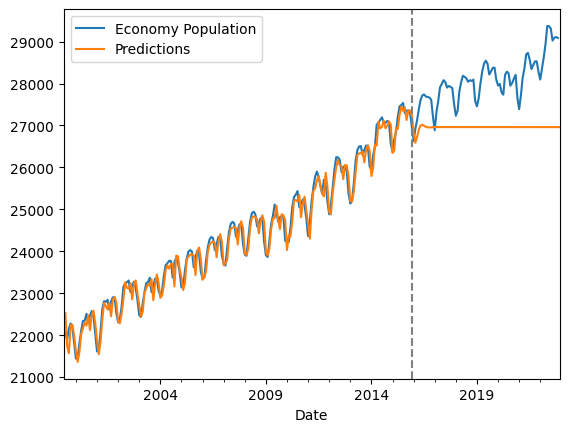

In [ ]:
model = ARIMA(series[:200], order=(2, 1, 3))
model_fit = model.fit()

series.plot()
model_fit.predict(start=1, end=282).plot(label="Predictions")
plt.axvline(x='2015-12', color='gray', linestyle='--')
plt.legend()
plt.show()

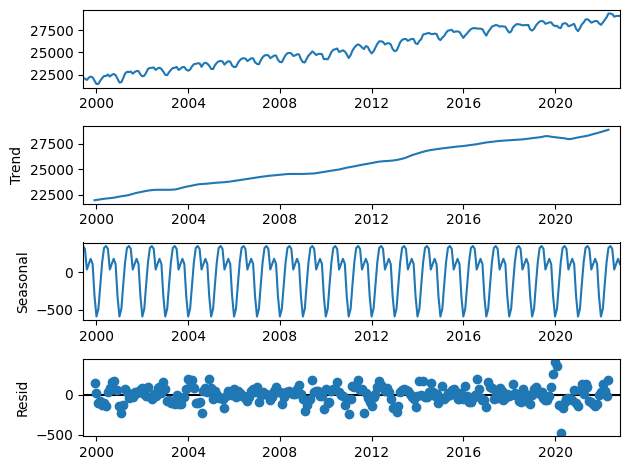

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
result = seasonal_decompose(series, model='add')
result.plot()
plt.show()